<a href="https://colab.research.google.com/github/SonaJaiswal/stance_prediction_acm/blob/main/twitter_stance_prediction_acm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math
 
# label encoding
from sklearn.preprocessing import OneHotEncoder
 
# Importing dataset
df=pd.read_csv('all.csv') 
print("Shape of data=>",df.shape)

Shape of data=> (4807, 18)


In [ ]:
df


,Username,Twitter_Handle,Twitter_User_Description,tweet_id,created_at,Tweet_text,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Political,Labels
0,Rana Ayyub,RanaAyyub,Journalist at @SubstackInc . Global Opinions W...,1.42E+18,23-07-2021 05:53,b'@BetterHope_NGO ',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0
1,Rana Ayyub,RanaAyyub,Journalist at @SubstackInc . Global Opinions W...,1.42E+18,23-07-2021 05:53,"b""RT @BetterHope_NGO: Please accept this certi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0
2,Rana Ayyub,RanaAyyub,Journalist at @SubstackInc . Global Opinions W...,1.42E+18,23-07-2021 05:48,"b'Leader who raids, snoops on our conversation...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0
3,Rana Ayyub,RanaAyyub,Journalist at @SubstackInc . Global Opinions W...,1.42E+18,23-07-2021 05:31,b'Telegraph hits the nail on the head https://...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2
4,Rana Ayyub,RanaAyyub,Journalist at @SubstackInc . Global Opinions W...,1.42E+18,22-07-2021 16:32,b'RT @RSF_inter: [THREAD] Blatant case of medi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4802,Abhishek,AbhishBanerj,"Mathematician, author, columnist. Views person...",1.42E+18,18-07-2021 11:46,b'@jkd18 ',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1
4803,Abhishek,AbhishBanerj,"Mathematician, author, columnist. Views person...",1.42E+18,18-07-2021 11:45,b'RT @jkd18: This REALLY SHOOK me...! Its so p...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1
4804,Abhishek,AbhishBanerj,"Mathematician, author, columnist. Views person...",1.42E+18,18-07-2021 09:28,b'@RKRameshBlore No!',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1
4805,Abhishek,AbhishBanerj,"Mathematician, author, columnist. Views person...",1.42E+18,18-07-2021 09:23,b'Pakistan is maintaining Covid restrictions d...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1


In [ ]:
df=df[['Username','Twitter_Handle','Twitter_User_Description','tweet_id','created_at','Tweet_text','Political','Labels']]
print("Shape of data=>",df.shape)
df.head(5)

Shape of data=> (4807, 8)


,Username,Twitter_Handle,Twitter_User_Description,tweet_id,created_at,Tweet_text,Political,Labels
0,Rana Ayyub,RanaAyyub,Journalist at @SubstackInc . Global Opinions W...,1.42E+18,23-07-2021 05:53,b'@BetterHope_NGO ',0.0,0
1,Rana Ayyub,RanaAyyub,Journalist at @SubstackInc . Global Opinions W...,1.42E+18,23-07-2021 05:53,"b""RT @BetterHope_NGO: Please accept this certi...",0.0,0
2,Rana Ayyub,RanaAyyub,Journalist at @SubstackInc . Global Opinions W...,1.42E+18,23-07-2021 05:48,"b'Leader who raids, snoops on our conversation...",1.0,0
3,Rana Ayyub,RanaAyyub,Journalist at @SubstackInc . Global Opinions W...,1.42E+18,23-07-2021 05:31,b'Telegraph hits the nail on the head https://...,1.0,2
4,Rana Ayyub,RanaAyyub,Journalist at @SubstackInc . Global Opinions W...,1.42E+18,22-07-2021 16:32,b'RT @RSF_inter: [THREAD] Blatant case of medi...,1.0,2


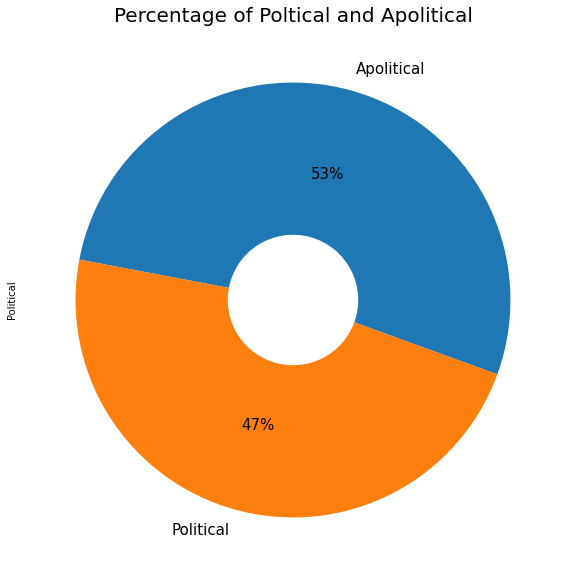

In [ ]:
plt.figure(figsize=(30,10))
plt.title('Percentage of Poltical and Apolitical', fontsize=20)
df.Political.value_counts().plot(kind='pie', labels=['Apolitical','Political'],
                              wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20, 
                              textprops={'fontsize': 15})

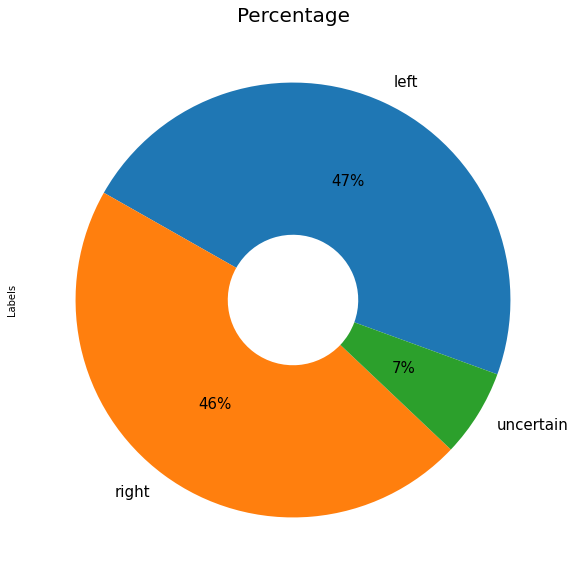

In [ ]:
plt.figure(figsize=(30,10))
plt.title('Percentage', fontsize=20)
df.Labels.value_counts().plot(kind='pie', labels=['left','right','uncertain'],
                              wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20, 
                              textprops={'fontsize': 15})

In [ ]:
df.drop('Username', axis=1, inplace=True)
df.drop('Twitter_Handle', axis=1, inplace=True)
df.drop('Twitter_User_Description', axis=1, inplace=True)
df.drop('tweet_id', axis=1, inplace=True)
df.drop('created_at', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df

,Tweet_text,Political,Labels
0,b'@BetterHope_NGO ',0.0,0
1,"b""RT @BetterHope_NGO: Please accept this certi...",0.0,0
2,"b'Leader who raids, snoops on our conversation...",1.0,0
3,b'Telegraph hits the nail on the head https://...,1.0,2
4,b'RT @RSF_inter: [THREAD] Blatant case of medi...,1.0,2
...,...,...,...
4802,b'@jkd18 ',0.0,1
4803,b'RT @jkd18: This REALLY SHOOK me...! Its so p...,1.0,1
4804,b'@RKRameshBlore No!',0.0,1
4805,b'Pakistan is maintaining Covid restrictions d...,1.0,1


PRE-PROCESSING


In [ ]:
pip install fasttext

     |████████████████████████████████| 68 kB 3.6 MB/s 
  Using cached pybind11-2.7.1-py2.py3-none-any.whl (200 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3096868 sha256=8cd636471b6ef3d56a4d028aaa8a084b94fb5cbc2fdc8f2d3d65e7738e7e4e02
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built fasttext


In [ ]:
pip install contractions

     |████████████████████████████████| 284 kB 4.9 MB/s 
     |████████████████████████████████| 321 kB 54.5 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85451 sha256=4a929ccab7490f9ca98ba054ea0007fe5e6c9384ccc6d36de86b6417744ea45c
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


In [ ]:
import nltk
import string
import matplotlib.pyplot as plt
import fasttext
import contractions
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
plt.xticks(rotation=70)
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)
%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df['tweet'] = df['Tweet_text'].apply(lambda x: [contractions.fix(word) for word in x.split()])
df.head()

,Tweet_text,Political,Labels,tweet
0,b'@BetterHope_NGO ',0.0,0,"[b'@BetterHope_NGO, ']"
1,"b""RT @BetterHope_NGO: Please accept this certificate @RanaAyyub ma'am for working tirelessly to ...",0.0,0,"[b""RT, @BetterHope_NGO:, Please, accept, this, certificate, @RanaAyyub, madam, for, working, tir..."
2,"b'Leader who raids, snoops on our conversations, slaps sedition on critics. What a petty, insecu...",1.0,0,"[b'Leader, who, raids,, snoops, on, our, conversations,, slaps, sedition, on, critics., What, a,..."
3,b'Telegraph hits the nail on the head https://t.co/Qyw8jMhG8v',1.0,2,"[b'Telegraph, hits, the, nail, on, the, head, https://t.co/Qyw8jMhG8v']"
4,b'RT @RSF_inter: [THREAD] Blatant case of media intimidation in #India: @RSF_inter condemns in t...,1.0,2,"[b'RT, @RSF_inter:, [THREAD], Blatant, case, of, media, intimidation, in, #India:, @RSF_inter, c..."


In [ ]:
df.drop('Tweet_text', axis=1, inplace=True)

In [ ]:
df['tweets_str'] = [' '.join(map(str, l)) for l in df['tweet']]
df.head()

,Political,Labels,tweet,tweets_str
0,0.0,0,"[b'@BetterHope_NGO, ']",b'@BetterHope_NGO '
1,0.0,0,"[b""RT, @BetterHope_NGO:, Please, accept, this, certificate, @RanaAyyub, madam, for, working, tir...","b""RT @BetterHope_NGO: Please accept this certificate @RanaAyyub madam for working tirelessly to ..."
2,1.0,0,"[b'Leader, who, raids,, snoops, on, our, conversations,, slaps, sedition, on, critics., What, a,...","b'Leader who raids, snoops on our conversations, slaps sedition on critics. What a petty, insecu..."
3,1.0,2,"[b'Telegraph, hits, the, nail, on, the, head, https://t.co/Qyw8jMhG8v']",b'Telegraph hits the nail on the head https://t.co/Qyw8jMhG8v'
4,1.0,2,"[b'RT, @RSF_inter:, [THREAD], Blatant, case, of, media, intimidation, in, #India:, @RSF_inter, c...",b'RT @RSF_inter: [THREAD] Blatant case of media intimidation in #India: @RSF_inter condemns in t...


In [ ]:
import re
df['cleanLinks'] = df['tweets_str'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

In [ ]:
df['tokenized'] = df['cleanLinks'].apply(word_tokenize)
df.head()

,Political,Labels,tweet,tweets_str,cleanLinks,tokenized
0,0.0,0,"[b'@BetterHope_NGO, ']",b'@BetterHope_NGO ',b'@BetterHope_NGO ',"[b, ', @, BetterHope_NGO, ']"
1,0.0,0,"[b""RT, @BetterHope_NGO:, Please, accept, this, certificate, @RanaAyyub, madam, for, working, tir...","b""RT @BetterHope_NGO: Please accept this certificate @RanaAyyub madam for working tirelessly to ...","b""RT @BetterHope_NGO: Please accept this certificate @RanaAyyub madam for working tirelessly to ...","[b, '', RT, @, BetterHope_NGO, :, Please, accept, this, certificate, @, RanaAyyub, madam, for, w..."
2,1.0,0,"[b'Leader, who, raids,, snoops, on, our, conversations,, slaps, sedition, on, critics., What, a,...","b'Leader who raids, snoops on our conversations, slaps sedition on critics. What a petty, insecu...","b'Leader who raids, snoops on our conversations, slaps sedition on critics. What a petty, insecu...","[b'Leader, who, raids, ,, snoops, on, our, conversations, ,, slaps, sedition, on, critics, ., Wh..."
3,1.0,2,"[b'Telegraph, hits, the, nail, on, the, head, https://t.co/Qyw8jMhG8v']",b'Telegraph hits the nail on the head https://t.co/Qyw8jMhG8v',b'Telegraph hits the nail on the head,"[b'Telegraph, hits, the, nail, on, the, head]"
4,1.0,2,"[b'RT, @RSF_inter:, [THREAD], Blatant, case, of, media, intimidation, in, #India:, @RSF_inter, c...",b'RT @RSF_inter: [THREAD] Blatant case of media intimidation in #India: @RSF_inter condemns in t...,b'RT @RSF_inter: [THREAD] Blatant case of media intimidation in #India: @RSF_inter condemns in t...,"[b'RT, @, RSF_inter, :, [, THREAD, ], Blatant, case, of, media, intimidation, in, #, India, :, @..."


In [ ]:
df['lower'] = df['tokenized'].apply(lambda x: [word.lower() for word in x])
df.head()

,Political,Labels,tweet,tweets_str,cleanLinks,tokenized,lower
0,0.0,0,"[b'@BetterHope_NGO, ']",b'@BetterHope_NGO ',b'@BetterHope_NGO ',"[b, ', @, BetterHope_NGO, ']","[b, ', @, betterhope_ngo, ']"
1,0.0,0,"[b""RT, @BetterHope_NGO:, Please, accept, this, certificate, @RanaAyyub, madam, for, working, tir...","b""RT @BetterHope_NGO: Please accept this certificate @RanaAyyub madam for working tirelessly to ...","b""RT @BetterHope_NGO: Please accept this certificate @RanaAyyub madam for working tirelessly to ...","[b, '', RT, @, BetterHope_NGO, :, Please, accept, this, certificate, @, RanaAyyub, madam, for, w...","[b, '', rt, @, betterhope_ngo, :, please, accept, this, certificate, @, ranaayyub, madam, for, w..."
2,1.0,0,"[b'Leader, who, raids,, snoops, on, our, conversations,, slaps, sedition, on, critics., What, a,...","b'Leader who raids, snoops on our conversations, slaps sedition on critics. What a petty, insecu...","b'Leader who raids, snoops on our conversations, slaps sedition on critics. What a petty, insecu...","[b'Leader, who, raids, ,, snoops, on, our, conversations, ,, slaps, sedition, on, critics, ., Wh...","[b'leader, who, raids, ,, snoops, on, our, conversations, ,, slaps, sedition, on, critics, ., wh..."
3,1.0,2,"[b'Telegraph, hits, the, nail, on, the, head, https://t.co/Qyw8jMhG8v']",b'Telegraph hits the nail on the head https://t.co/Qyw8jMhG8v',b'Telegraph hits the nail on the head,"[b'Telegraph, hits, the, nail, on, the, head]","[b'telegraph, hits, the, nail, on, the, head]"
4,1.0,2,"[b'RT, @RSF_inter:, [THREAD], Blatant, case, of, media, intimidation, in, #India:, @RSF_inter, c...",b'RT @RSF_inter: [THREAD] Blatant case of media intimidation in #India: @RSF_inter condemns in t...,b'RT @RSF_inter: [THREAD] Blatant case of media intimidation in #India: @RSF_inter condemns in t...,"[b'RT, @, RSF_inter, :, [, THREAD, ], Blatant, case, of, media, intimidation, in, #, India, :, @...","[b'rt, @, rsf_inter, :, [, thread, ], blatant, case, of, media, intimidation, in, #, india, :, @..."


In [ ]:
punc = string.punctuation
df['no_punc'] = df['lower'].apply(lambda x: [word for word in x if word not in punc])
df.head()

,Political,Labels,tweet,tweets_str,cleanLinks,tokenized,lower,no_punc
0,0.0,0,"[b'@BetterHope_NGO, ']",b'@BetterHope_NGO ',b'@BetterHope_NGO ',"[b, ', @, BetterHope_NGO, ']","[b, ', @, betterhope_ngo, ']","[b, betterhope_ngo]"
1,0.0,0,"[b""RT, @BetterHope_NGO:, Please, accept, this, certificate, @RanaAyyub, madam, for, working, tir...","b""RT @BetterHope_NGO: Please accept this certificate @RanaAyyub madam for working tirelessly to ...","b""RT @BetterHope_NGO: Please accept this certificate @RanaAyyub madam for working tirelessly to ...","[b, '', RT, @, BetterHope_NGO, :, Please, accept, this, certificate, @, RanaAyyub, madam, for, w...","[b, '', rt, @, betterhope_ngo, :, please, accept, this, certificate, @, ranaayyub, madam, for, w...","[b, '', rt, betterhope_ngo, please, accept, this, certificate, ranaayyub, madam, for, working, t..."
2,1.0,0,"[b'Leader, who, raids,, snoops, on, our, conversations,, slaps, sedition, on, critics., What, a,...","b'Leader who raids, snoops on our conversations, slaps sedition on critics. What a petty, insecu...","b'Leader who raids, snoops on our conversations, slaps sedition on critics. What a petty, insecu...","[b'Leader, who, raids, ,, snoops, on, our, conversations, ,, slaps, sedition, on, critics, ., Wh...","[b'leader, who, raids, ,, snoops, on, our, conversations, ,, slaps, sedition, on, critics, ., wh...","[b'leader, who, raids, snoops, on, our, conversations, slaps, sedition, on, critics, what, a, pe..."
3,1.0,2,"[b'Telegraph, hits, the, nail, on, the, head, https://t.co/Qyw8jMhG8v']",b'Telegraph hits the nail on the head https://t.co/Qyw8jMhG8v',b'Telegraph hits the nail on the head,"[b'Telegraph, hits, the, nail, on, the, head]","[b'telegraph, hits, the, nail, on, the, head]","[b'telegraph, hits, the, nail, on, the, head]"
4,1.0,2,"[b'RT, @RSF_inter:, [THREAD], Blatant, case, of, media, intimidation, in, #India:, @RSF_inter, c...",b'RT @RSF_inter: [THREAD] Blatant case of media intimidation in #India: @RSF_inter condemns in t...,b'RT @RSF_inter: [THREAD] Blatant case of media intimidation in #India: @RSF_inter condemns in t...,"[b'RT, @, RSF_inter, :, [, THREAD, ], Blatant, case, of, media, intimidation, in, #, India, :, @...","[b'rt, @, rsf_inter, :, [, thread, ], blatant, case, of, media, intimidation, in, #, india, :, @...","[b'rt, rsf_inter, thread, blatant, case, of, media, intimidation, in, india, rsf_inter, condemns..."


In [ ]:
>>> nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
df['stopwords_removed'] = df['no_punc'].apply(lambda x: [word for word in x if word not in stop_words])
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Political,Labels,tweet,tweets_str,cleanLinks,tokenized,lower,no_punc,stopwords_removed
0,0.0,0,"[b'@BetterHope_NGO, ']",b'@BetterHope_NGO ',b'@BetterHope_NGO ',"[b, ', @, BetterHope_NGO, ']","[b, ', @, betterhope_ngo, ']","[b, betterhope_ngo]","[b, betterhope_ngo]"
1,0.0,0,"[b""RT, @BetterHope_NGO:, Please, accept, this, certificate, @RanaAyyub, madam, for, working, tir...","b""RT @BetterHope_NGO: Please accept this certificate @RanaAyyub madam for working tirelessly to ...","b""RT @BetterHope_NGO: Please accept this certificate @RanaAyyub madam for working tirelessly to ...","[b, '', RT, @, BetterHope_NGO, :, Please, accept, this, certificate, @, RanaAyyub, madam, for, w...","[b, '', rt, @, betterhope_ngo, :, please, accept, this, certificate, @, ranaayyub, madam, for, w...","[b, '', rt, betterhope_ngo, please, accept, this, certificate, ranaayyub, madam, for, working, t...","[b, '', rt, betterhope_ngo, please, accept, certificate, ranaayyub, madam, working, tirelessly, ..."
2,1.0,0,"[b'Leader, who, raids,, snoops, on, our, conversations,, slaps, sedition, on, critics., What, a,...","b'Leader who raids, snoops on our conversations, slaps sedition on critics. What a petty, insecu...","b'Leader who raids, snoops on our conversations, slaps sedition on critics. What a petty, insecu...","[b'Leader, who, raids, ,, snoops, on, our, conversations, ,, slaps, sedition, on, critics, ., Wh...","[b'leader, who, raids, ,, snoops, on, our, conversations, ,, slaps, sedition, on, critics, ., wh...","[b'leader, who, raids, snoops, on, our, conversations, slaps, sedition, on, critics, what, a, pe...","[b'leader, raids, snoops, conversations, slaps, sedition, critics, petty, insecure, vindictive, ..."
3,1.0,2,"[b'Telegraph, hits, the, nail, on, the, head, https://t.co/Qyw8jMhG8v']",b'Telegraph hits the nail on the head https://t.co/Qyw8jMhG8v',b'Telegraph hits the nail on the head,"[b'Telegraph, hits, the, nail, on, the, head]","[b'telegraph, hits, the, nail, on, the, head]","[b'telegraph, hits, the, nail, on, the, head]","[b'telegraph, hits, nail, head]"
4,1.0,2,"[b'RT, @RSF_inter:, [THREAD], Blatant, case, of, media, intimidation, in, #India:, @RSF_inter, c...",b'RT @RSF_inter: [THREAD] Blatant case of media intimidation in #India: @RSF_inter condemns in t...,b'RT @RSF_inter: [THREAD] Blatant case of media intimidation in #India: @RSF_inter condemns in t...,"[b'RT, @, RSF_inter, :, [, THREAD, ], Blatant, case, of, media, intimidation, in, #, India, :, @...","[b'rt, @, rsf_inter, :, [, thread, ], blatant, case, of, media, intimidation, in, #, india, :, @...","[b'rt, rsf_inter, thread, blatant, case, of, media, intimidation, in, india, rsf_inter, condemns...","[b'rt, rsf_inter, thread, blatant, case, media, intimidation, india, rsf_inter, condemns, strong..."


In [ ]:
>>> nltk.download('averaged_perceptron_tagger')
df['pos_tags'] = df['stopwords_removed'].apply(nltk.tag.pos_tag)
df.head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,Political,Labels,tweet,tweets_str,cleanLinks,tokenized,lower,no_punc,stopwords_removed,pos_tags
0,0.0,0,"[b'@BetterHope_NGO, ']",b'@BetterHope_NGO ',b'@BetterHope_NGO ',"[b, ', @, BetterHope_NGO, ']","[b, ', @, betterhope_ngo, ']","[b, betterhope_ngo]","[b, betterhope_ngo]","[(b, NN), (betterhope_ngo, NN)]"
1,0.0,0,"[b""RT, @BetterHope_NGO:, Please, accept, this, certificate, @RanaAyyub, madam, for, working, tir...","b""RT @BetterHope_NGO: Please accept this certificate @RanaAyyub madam for working tirelessly to ...","b""RT @BetterHope_NGO: Please accept this certificate @RanaAyyub madam for working tirelessly to ...","[b, '', RT, @, BetterHope_NGO, :, Please, accept, this, certificate, @, RanaAyyub, madam, for, w...","[b, '', rt, @, betterhope_ngo, :, please, accept, this, certificate, @, ranaayyub, madam, for, w...","[b, '', rt, betterhope_ngo, please, accept, this, certificate, ranaayyub, madam, for, working, t...","[b, '', rt, betterhope_ngo, please, accept, certificate, ranaayyub, madam, working, tirelessly, ...","[(b, NN), ('', ''), (rt, NN), (betterhope_ngo, NN), (please, NN), (accept, VB), (certificate, NN..."
2,1.0,0,"[b'Leader, who, raids,, snoops, on, our, conversations,, slaps, sedition, on, critics., What, a,...","b'Leader who raids, snoops on our conversations, slaps sedition on critics. What a petty, insecu...","b'Leader who raids, snoops on our conversations, slaps sedition on critics. What a petty, insecu...","[b'Leader, who, raids, ,, snoops, on, our, conversations, ,, slaps, sedition, on, critics, ., Wh...","[b'leader, who, raids, ,, snoops, on, our, conversations, ,, slaps, sedition, on, critics, ., wh...","[b'leader, who, raids, snoops, on, our, conversations, slaps, sedition, on, critics, what, a, pe...","[b'leader, raids, snoops, conversations, slaps, sedition, critics, petty, insecure, vindictive, ...","[(b'leader, NN), (raids, NNS), (snoops, VBP), (conversations, NNS), (slaps, NNS), (sedition, NN)..."
3,1.0,2,"[b'Telegraph, hits, the, nail, on, the, head, https://t.co/Qyw8jMhG8v']",b'Telegraph hits the nail on the head https://t.co/Qyw8jMhG8v',b'Telegraph hits the nail on the head,"[b'Telegraph, hits, the, nail, on, the, head]","[b'telegraph, hits, the, nail, on, the, head]","[b'telegraph, hits, the, nail, on, the, head]","[b'telegraph, hits, nail, head]","[(b'telegraph, NN), (hits, NNS), (nail, VBP), (head, NN)]"
4,1.0,2,"[b'RT, @RSF_inter:, [THREAD], Blatant, case, of, media, intimidation, in, #India:, @RSF_inter, c...",b'RT @RSF_inter: [THREAD] Blatant case of media intimidation in #India: @RSF_inter condemns in t...,b'RT @RSF_inter: [THREAD] Blatant case of media intimidation in #India: @RSF_inter condemns in t...,"[b'RT, @, RSF_inter, :, [, THREAD, ], Blatant, case, of, media, intimidation, in, #, India, :, @...","[b'rt, @, rsf_inter, :, [, thread, ], blatant, case, of, media, intimidation, in, #, india, :, @...","[b'rt, rsf_inter, thread, blatant, case, of, media, intimidation, in, india, rsf_inter, condemns...","[b'rt, rsf_inter, thread, blatant, case, media, intimidation, india, rsf_inter, condemns, strong...","[(b'rt, NN), (rsf_inter, NN), (thread, NN), (blatant, NN), (case, NN), (media, NNS), (intimidati..."


In [ ]:
>>> nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
df['wordnet_pos'] = df['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
df.head()

,Political,Labels,tweet,tweets_str,cleanLinks,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos
0,0.0,0,"[b'@BetterHope_NGO, ']",b'@BetterHope_NGO ',b'@BetterHope_NGO ',"[b, ', @, BetterHope_NGO, ']","[b, ', @, betterhope_ngo, ']","[b, betterhope_ngo]","[b, betterhope_ngo]","[(b, NN), (betterhope_ngo, NN)]","[(b, n), (betterhope_ngo, n)]"
1,0.0,0,"[b""RT, @BetterHope_NGO:, Please, accept, this, certificate, @RanaAyyub, madam, for, working, tir...","b""RT @BetterHope_NGO: Please accept this certificate @RanaAyyub madam for working tirelessly to ...","b""RT @BetterHope_NGO: Please accept this certificate @RanaAyyub madam for working tirelessly to ...","[b, '', RT, @, BetterHope_NGO, :, Please, accept, this, certificate, @, RanaAyyub, madam, for, w...","[b, '', rt, @, betterhope_ngo, :, please, accept, this, certificate, @, ranaayyub, madam, for, w...","[b, '', rt, betterhope_ngo, please, accept, this, certificate, ranaayyub, madam, for, working, t...","[b, '', rt, betterhope_ngo, please, accept, certificate, ranaayyub, madam, working, tirelessly, ...","[(b, NN), ('', ''), (rt, NN), (betterhope_ngo, NN), (please, NN), (accept, VB), (certificate, NN...","[(b, n), ('', n), (rt, n), (betterhope_ngo, n), (please, n), (accept, v), (certificate, n), (ran..."
2,1.0,0,"[b'Leader, who, raids,, snoops, on, our, conversations,, slaps, sedition, on, critics., What, a,...","b'Leader who raids, snoops on our conversations, slaps sedition on critics. What a petty, insecu...","b'Leader who raids, snoops on our conversations, slaps sedition on critics. What a petty, insecu...","[b'Leader, who, raids, ,, snoops, on, our, conversations, ,, slaps, sedition, on, critics, ., Wh...","[b'leader, who, raids, ,, snoops, on, our, conversations, ,, slaps, sedition, on, critics, ., wh...","[b'leader, who, raids, snoops, on, our, conversations, slaps, sedition, on, critics, what, a, pe...","[b'leader, raids, snoops, conversations, slaps, sedition, critics, petty, insecure, vindictive, ...","[(b'leader, NN), (raids, NNS), (snoops, VBP), (conversations, NNS), (slaps, NNS), (sedition, NN)...","[(b'leader, n), (raids, n), (snoops, v), (conversations, n), (slaps, n), (sedition, n), (critics..."
3,1.0,2,"[b'Telegraph, hits, the, nail, on, the, head, https://t.co/Qyw8jMhG8v']",b'Telegraph hits the nail on the head https://t.co/Qyw8jMhG8v',b'Telegraph hits the nail on the head,"[b'Telegraph, hits, the, nail, on, the, head]","[b'telegraph, hits, the, nail, on, the, head]","[b'telegraph, hits, the, nail, on, the, head]","[b'telegraph, hits, nail, head]","[(b'telegraph, NN), (hits, NNS), (nail, VBP), (head, NN)]","[(b'telegraph, n), (hits, n), (nail, v), (head, n)]"
4,1.0,2,"[b'RT, @RSF_inter:, [THREAD], Blatant, case, of, media, intimidation, in, #India:, @RSF_inter, c...",b'RT @RSF_inter: [THREAD] Blatant case of media intimidation in #India: @RSF_inter condemns in t...,b'RT @RSF_inter: [THREAD] Blatant case of media intimidation in #India: @RSF_inter condemns in t...,"[b'RT, @, RSF_inter, :, [, THREAD, ], Blatant, case, of, media, intimidation, in, #, India, :, @...","[b'rt, @, rsf_inter, :, [, thread, ], blatant, case, of, media, intimidation, in, #, india, :, @...","[b'rt, rsf_inter, thread, blatant, case, of, media, intimidation, in, india, rsf_inter, condemns...","[b'rt, rsf_inter, thread, blatant, case, media, intimidation, india, rsf_inter, condemns, strong...","[(b'rt, NN), (rsf_inter, NN), (thread, NN), (blatant, NN), (case, NN), (media, NNS), (intimidati...","[(b'rt, n), (rsf_inter, n), (thread, n), (blatant, n), (case, n), (media, n), (intimidation, n),..."


In [ ]:
wnl = WordNetLemmatizer()
df['lemmatized'] = df['wordnet_pos'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
df.head()

,Political,Labels,tweet,tweets_str,cleanLinks,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized
0,0.0,0,"[b'@BetterHope_NGO, ']",b'@BetterHope_NGO ',b'@BetterHope_NGO ',"[b, ', @, BetterHope_NGO, ']","[b, ', @, betterhope_ngo, ']","[b, betterhope_ngo]","[b, betterhope_ngo]","[(b, NN), (betterhope_ngo, NN)]","[(b, n), (betterhope_ngo, n)]","[b, betterhope_ngo]"
1,0.0,0,"[b""RT, @BetterHope_NGO:, Please, accept, this, certificate, @RanaAyyub, madam, for, working, tir...","b""RT @BetterHope_NGO: Please accept this certificate @RanaAyyub madam for working tirelessly to ...","b""RT @BetterHope_NGO: Please accept this certificate @RanaAyyub madam for working tirelessly to ...","[b, '', RT, @, BetterHope_NGO, :, Please, accept, this, certificate, @, RanaAyyub, madam, for, w...","[b, '', rt, @, betterhope_ngo, :, please, accept, this, certificate, @, ranaayyub, madam, for, w...","[b, '', rt, betterhope_ngo, please, accept, this, certificate, ranaayyub, madam, for, working, t...","[b, '', rt, betterhope_ngo, please, accept, certificate, ranaayyub, madam, working, tirelessly, ...","[(b, NN), ('', ''), (rt, NN), (betterhope_ngo, NN), (please, NN), (accept, VB), (certificate, NN...","[(b, n), ('', n), (rt, n), (betterhope_ngo, n), (please, n), (accept, v), (certificate, n), (ran...","[b, '', rt, betterhope_ngo, please, accept, certificate, ranaayyub, madam, work, tirelessly, hel..."
2,1.0,0,"[b'Leader, who, raids,, snoops, on, our, conversations,, slaps, sedition, on, critics., What, a,...","b'Leader who raids, snoops on our conversations, slaps sedition on critics. What a petty, insecu...","b'Leader who raids, snoops on our conversations, slaps sedition on critics. What a petty, insecu...","[b'Leader, who, raids, ,, snoops, on, our, conversations, ,, slaps, sedition, on, critics, ., Wh...","[b'leader, who, raids, ,, snoops, on, our, conversations, ,, slaps, sedition, on, critics, ., wh...","[b'leader, who, raids, snoops, on, our, conversations, slaps, sedition, on, critics, what, a, pe...","[b'leader, raids, snoops, conversations, slaps, sedition, critics, petty, insecure, vindictive, ...","[(b'leader, NN), (raids, NNS), (snoops, VBP), (conversations, NNS), (slaps, NNS), (sedition, NN)...","[(b'leader, n), (raids, n), (snoops, v), (conversations, n), (slaps, n), (sedition, n), (critics...","[b'leader, raid, snoop, conversation, slap, sedition, critic, petty, insecure, vindictive, man, ..."
3,1.0,2,"[b'Telegraph, hits, the, nail, on, the, head, https://t.co/Qyw8jMhG8v']",b'Telegraph hits the nail on the head https://t.co/Qyw8jMhG8v',b'Telegraph hits the nail on the head,"[b'Telegraph, hits, the, nail, on, the, head]","[b'telegraph, hits, the, nail, on, the, head]","[b'telegraph, hits, the, nail, on, the, head]","[b'telegraph, hits, nail, head]","[(b'telegraph, NN), (hits, NNS), (nail, VBP), (head, NN)]","[(b'telegraph, n), (hits, n), (nail, v), (head, n)]","[b'telegraph, hit, nail, head]"
4,1.0,2,"[b'RT, @RSF_inter:, [THREAD], Blatant, case, of, media, intimidation, in, #India:, @RSF_inter, c...",b'RT @RSF_inter: [THREAD] Blatant case of media intimidation in #India: @RSF_inter condemns in t...,b'RT @RSF_inter: [THREAD] Blatant case of media intimidation in #India: @RSF_inter condemns in t...,"[b'RT, @, RSF_inter, :, [, THREAD, ], Blatant, case, of, media, intimidation, in, #, India, :, @...","[b'rt, @, rsf_inter, :, [, thread, ], blatant, case, of, media, intimidation, in, #, india, :, @...","[b'rt, rsf_inter, thread, blatant, case, of, media, intimidation, in, india, rsf_inter, condemns...","[b'rt, rsf_inter, thread, blatant, case, media, intimidation, india, rsf_inter, condemns, strong...","[(b'rt, NN), (rsf_inter, NN), (thread, NN), (blatant, NN), (case, NN), (media, NNS), (intimidati...","[(b'rt, n), (rsf_inter, n), (thread, n), (blatant, n), (case, n), (media, n), (intimidation, n),...","[b'rt, rsf_inter, thread, blatant, case, medium, intimidation, india, rsf_inter, condemns, stron..."


In [ ]:
df.drop('tokenized', axis=1, inplace=True)
df.drop('lower', axis=1, inplace=True)
df.drop('no_punc', axis=1, inplace=True)
df.drop('stopwords_removed', axis=1, inplace=True)
df.drop('pos_tags', axis=1, inplace=True)
df.drop('wordnet_pos', axis=1, inplace=True)
df.drop('tweet', axis=1, inplace=True)
df.drop('tweets_str', axis=1, inplace=True)


In [ ]:
df.drop('cleanLinks', axis=1, inplace=True)


In [ ]:
df

,Political,Labels,lemmatized
0,0.0,0,"[b, betterhope_ngo]"
1,0.0,0,"[b, '', rt, betterhope_ngo, please, accept, certificate, ranaayyub, madam, work, tirelessly, hel..."
2,1.0,0,"[b'leader, raid, snoop, conversation, slap, sedition, critic, petty, insecure, vindictive, man, ..."
3,1.0,2,"[b'telegraph, hit, nail, head]"
4,1.0,2,"[b'rt, rsf_inter, thread, blatant, case, medium, intimidation, india, rsf_inter, condemns, stron..."
...,...,...,...
4802,0.0,1,"[b, jkd18]"
4803,1.0,1,"[b'rt, jkd18, really, shake, ..., perceptive, abhishbanerj, see, certainly, brave, share, u, kno..."
4804,0.0,1,"[b, rkrameshblore]"
4805,1.0,1,"[b'pakistan, maintain, covid, restriction, bakr-eid.\n\nthen, kerala, lift, restriction, g, ...]"


In [ ]:
# PRE-PROCESSING (TO DO)
# 0-1 change  - RIDHIMA 
# word to vector convert - SHIKHA, SONA, SNIGDHA
# piechart - SAKSHI 

In [ ]:
df

,Political,Labels,lemmatized
0,0.0,0,"[b, betterhope_ngo]"
1,0.0,0,"[b, '', rt, betterhope_ngo, please, accept, certificate, ranaayyub, madam, work, tirelessly, hel..."
2,1.0,0,"[b'leader, raid, snoop, conversation, slap, sedition, critic, petty, insecure, vindictive, man, ..."
3,1.0,2,"[b'telegraph, hit, nail, head]"
4,1.0,2,"[b'rt, rsf_inter, thread, blatant, case, medium, intimidation, india, rsf_inter, condemns, stron..."
...,...,...,...
4802,0.0,1,"[b, jkd18]"
4803,1.0,1,"[b'rt, jkd18, really, shake, ..., perceptive, abhishbanerj, see, certainly, brave, share, u, kno..."
4804,0.0,1,"[b, rkrameshblore]"
4805,1.0,1,"[b'pakistan, maintain, covid, restriction, bakr-eid.\n\nthen, kerala, lift, restriction, g, ...]"


In [ ]:
df['tweet_str'] = [' '.join(map(str, l)) for l in df['lemmatized']]
df.head()

,Political,Labels,lemmatized,tweet_str
0,0.0,0,"[b, betterhope_ngo]",b betterhope_ngo
1,0.0,0,"[b, '', rt, betterhope_ngo, please, accept, certificate, ranaayyub, madam, work, tirelessly, hel...",b '' rt betterhope_ngo please accept certificate ranaayyub madam work tirelessly help needy one ...
2,1.0,0,"[b'leader, raid, snoop, conversation, slap, sedition, critic, petty, insecure, vindictive, man, ...",b'leader raid snoop conversation slap sedition critic petty insecure vindictive man sir
3,1.0,2,"[b'telegraph, hit, nail, head]",b'telegraph hit nail head
4,1.0,2,"[b'rt, rsf_inter, thread, blatant, case, medium, intimidation, india, rsf_inter, condemns, stron...",b'rt rsf_inter thread blatant case medium intimidation india rsf_inter condemns strong term mult...


In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
#tokenize and tag the card text
card_docs = [TaggedDocument(doc.split(' '), [i]) 
             for i, doc in enumerate(df.tweet_str)]
#display the tagged docs
card_docs

[TaggedDocument(words=['b', 'betterhope_ngo'], tags=[0]),
 TaggedDocument(words=['b', "''", 'rt', 'betterhope_ngo', 'please', 'accept', 'certificate', 'ranaayyub', 'madam', 'work', 'tirelessly', 'help', 'needy', 'one', 'since', 'first', 'wave', 'whether', '...', "''"], tags=[1]),
 TaggedDocument(words=["b'leader", 'raid', 'snoop', 'conversation', 'slap', 'sedition', 'critic', 'petty', 'insecure', 'vindictive', 'man', 'sir'], tags=[2]),
 TaggedDocument(words=["b'telegraph", 'hit', 'nail', 'head'], tags=[3]),
 TaggedDocument(words=["b'rt", 'rsf_inter', 'thread', 'blatant', 'case', 'medium', 'intimidation', 'india', 'rsf_inter', 'condemns', 'strong', 'term', 'multiple', 'tax', 'raid', 'c', '...'], tags=[4]),
 TaggedDocument(words=["b'democracy"], tags=[5]),
 TaggedDocument(words=["b'a", 'reminder'], tags=[6]),
 TaggedDocument(words=["b'rt", 'ranaayyub', 'truth', 'shall', 'always', 'unpopular'], tags=[7]),
 TaggedDocument(words=["b'rt", 'ranaayyub', 'announcement', 'crucial', 'juncture', '

In [ ]:
model = Doc2Vec(vector_size=64, min_count=1, epochs = 20)


In [ ]:
model = Doc2Vec(vector_size=64, window=2, min_count=1, workers=8, epochs = 40)
#build vocab
model.build_vocab(card_docs)
#train model
model.train(card_docs, total_examples=model.corpus_count
            , epochs=model.epochs)

In [ ]:
#generate vector

card2vec = [model.infer_vector((df['tweet_str'][i].split(' '))) 
            for i in range(0,len(df['tweet_str']))]
card2vec


[array([-0.04283197, -0.02609969, -0.05754094,  0.08593349,  0.00547511,
        -0.1322083 ,  0.0695553 ,  0.01835706, -0.12853004,  0.09041316,
        -0.05764708,  0.03709083, -0.04161531,  0.04377398,  0.06331623,
        -0.06140427,  0.09623145, -0.00876933, -0.17828937, -0.08289407,
         0.03917138,  0.01068888, -0.14244732, -0.10873102,  0.12335328,
         0.07136494, -0.05809251,  0.09207344, -0.06693562,  0.00253124,
         0.1257037 , -0.05479367,  0.0226887 , -0.01878344, -0.03230928,
        -0.07116687, -0.00874123,  0.03971212,  0.03658156, -0.06182497,
        -0.0731368 , -0.05075514,  0.03174535, -0.00772   ,  0.08906475,
         0.04677428,  0.07420456, -0.06980863,  0.0095668 , -0.05818474,
        -0.08822101,  0.09738551,  0.01696827,  0.01985524,  0.01859047,
         0.12994729, -0.00866617, -0.13277964, -0.11937223,  0.08149501,
        -0.04607016,  0.00799477, -0.17442901, -0.09117346], dtype=float32),
 array([ 6.36473745e-02, -9.11565572e-02, -1.30

In [ ]:
import numpy as np
#Create a list of lists
dtv= np.array(card2vec).tolist()
#set list to dataframe column
df['card2vec'] = dtv
df.head(2)

,Political,Labels,lemmatized,tweet_str,card2vec
0,0.0,0,"[b, betterhope_ngo]",b betterhope_ngo,"[-0.04283197224140167, -0.026099691167473793, -0.05754093825817108, 0.08593349158763885, 0.00547..."
1,0.0,0,"[b, '', rt, betterhope_ngo, please, accept, certificate, ranaayyub, madam, work, tirelessly, hel...",b '' rt betterhope_ngo please accept certificate ranaayyub madam work tirelessly help needy one ...,"[0.06364737451076508, -0.09115655720233917, -0.13086654245853424, 0.3195057213306427, -0.0649085..."


In [ ]:
df

,Political,Labels,lemmatized,tweet_str,card2vec
0,0.0,0,"[b, betterhope_ngo]",b betterhope_ngo,"[-0.04283197224140167, -0.026099691167473793, -0.05754093825817108, 0.08593349158763885, 0.00547..."
1,0.0,0,"[b, '', rt, betterhope_ngo, please, accept, certificate, ranaayyub, madam, work, tirelessly, hel...",b '' rt betterhope_ngo please accept certificate ranaayyub madam work tirelessly help needy one ...,"[0.06364737451076508, -0.09115655720233917, -0.13086654245853424, 0.3195057213306427, -0.0649085..."
2,1.0,0,"[b'leader, raid, snoop, conversation, slap, sedition, critic, petty, insecure, vindictive, man, ...",b'leader raid snoop conversation slap sedition critic petty insecure vindictive man sir,"[-0.23356124758720398, -0.03547735512256622, -0.09566096216440201, 0.11870063096284866, 0.060603..."
3,1.0,2,"[b'telegraph, hit, nail, head]",b'telegraph hit nail head,"[0.020993907004594803, -0.03149423748254776, -0.08763667196035385, 0.07267534732818604, -0.00027..."
4,1.0,2,"[b'rt, rsf_inter, thread, blatant, case, medium, intimidation, india, rsf_inter, condemns, stron...",b'rt rsf_inter thread blatant case medium intimidation india rsf_inter condemns strong term mult...,"[0.04786405712366104, -0.10101903229951859, -0.2047395408153534, 0.11841928213834763, -0.1008817..."
...,...,...,...,...,...
4802,0.0,1,"[b, jkd18]",b jkd18,"[-0.022704897448420525, -0.026977678760886192, -0.03142275661230087, 0.06900575757026672, -0.007..."
4803,1.0,1,"[b'rt, jkd18, really, shake, ..., perceptive, abhishbanerj, see, certainly, brave, share, u, kno...",b'rt jkd18 really shake ... perceptive abhishbanerj see certainly brave share u know ...,"[0.1184026226401329, -0.10239211469888687, -0.1822483390569687, 0.08803988993167877, -0.01329048..."
4804,0.0,1,"[b, rkrameshblore]",b rkrameshblore,"[-0.05093476548790932, -0.03680160641670227, -0.035648003220558167, 0.07520121335983276, 0.01120..."
4805,1.0,1,"[b'pakistan, maintain, covid, restriction, bakr-eid.\n\nthen, kerala, lift, restriction, g, ...]",b'pakistan maintain covid restriction bakr-eid.\n\nthen kerala lift restriction g ...,"[0.08106935024261475, 0.048032503575086594, -0.23321698606014252, 0.22053846716880798, -0.032686..."


In [ ]:
df = df[df.Political!= 0]
df

,Political,Labels,lemmatized,tweet_str,card2vec
2,1.0,0,"[b'leader, raid, snoop, conversation, slap, sedition, critic, petty, insecure, vindictive, man, ...",b'leader raid snoop conversation slap sedition critic petty insecure vindictive man sir,"[-0.23356124758720398, -0.03547735512256622, -0.09566096216440201, 0.11870063096284866, 0.060603..."
3,1.0,2,"[b'telegraph, hit, nail, head]",b'telegraph hit nail head,"[0.020993907004594803, -0.03149423748254776, -0.08763667196035385, 0.07267534732818604, -0.00027..."
4,1.0,2,"[b'rt, rsf_inter, thread, blatant, case, medium, intimidation, india, rsf_inter, condemns, stron...",b'rt rsf_inter thread blatant case medium intimidation india rsf_inter condemns strong term mult...,"[0.04786405712366104, -0.10101903229951859, -0.2047395408153534, 0.11841928213834763, -0.1008817..."
8,1.0,0,"[b'rt, ranaayyub, announcement, crucial, juncture, press, freedom, india, joining, substackinc, ...",b'rt ranaayyub announcement crucial juncture press freedom india joining substackinc platform li...,"[-0.03565210849046707, -0.09509562700986862, -0.19385123252868652, 0.17842483520507812, -0.00462..."
9,1.0,0,"[b'arre, madam, exist, prove, citizenship, forever, indebted]",b'arre madam exist prove citizenship forever indebted,"[-0.03917243331670761, -0.041972436010837555, -0.189788818359375, 0.19913773238658905, -0.009300..."
...,...,...,...,...,...
4799,1.0,1,"[b'it, incredible, thing, rarely, talk, about.\n\ntoday, learn, jamia, milium, delhi, reserve, 5...",b'it incredible thing rarely talk about.\n\ntoday learn jamia milium delhi reserve 50 seat ...,"[0.10251200944185257, -0.035038355737924576, -0.28471192717552185, 0.13700109720230103, -0.04618..."
4800,1.0,2,"[b'rt, rohitjo14921532, zulu, deal, curry, relative, learn, speak, racist, attack, indians, sou,...",b'rt rohitjo14921532 zulu deal curry relative learn speak racist attack indians sou ...,"[0.0035261015873402357, -0.21235109865665436, -0.1514991670846939, 0.15571923553943634, 0.027359..."
4801,1.0,1,"[b'rt, opindia_com, send, message, communist, kerala, relaxed, covid, norm, eid, pakistan, abhis...",b'rt opindia_com send message communist kerala relaxed covid norm eid pakistan abhishbanerj writ...,"[-0.022915158420801163, 0.12234174460172653, -0.24888746440410614, 0.26728126406669617, -0.12176..."
4803,1.0,1,"[b'rt, jkd18, really, shake, ..., perceptive, abhishbanerj, see, certainly, brave, share, u, kno...",b'rt jkd18 really shake ... perceptive abhishbanerj see certainly brave share u know ...,"[0.1184026226401329, -0.10239211469888687, -0.1822483390569687, 0.08803988993167877, -0.01329048..."


In [ ]:
df



,Political,Labels,lemmatized,tweet_str,card2vec
2,1.0,0,"[b'leader, raid, snoop, conversation, slap, sedition, critic, petty, insecure, vindictive, man, ...",b'leader raid snoop conversation slap sedition critic petty insecure vindictive man sir,"[-0.23356124758720398, -0.03547735512256622, -0.09566096216440201, 0.11870063096284866, 0.060603..."
3,1.0,2,"[b'telegraph, hit, nail, head]",b'telegraph hit nail head,"[0.020993907004594803, -0.03149423748254776, -0.08763667196035385, 0.07267534732818604, -0.00027..."
4,1.0,2,"[b'rt, rsf_inter, thread, blatant, case, medium, intimidation, india, rsf_inter, condemns, stron...",b'rt rsf_inter thread blatant case medium intimidation india rsf_inter condemns strong term mult...,"[0.04786405712366104, -0.10101903229951859, -0.2047395408153534, 0.11841928213834763, -0.1008817..."
8,1.0,0,"[b'rt, ranaayyub, announcement, crucial, juncture, press, freedom, india, joining, substackinc, ...",b'rt ranaayyub announcement crucial juncture press freedom india joining substackinc platform li...,"[-0.03565210849046707, -0.09509562700986862, -0.19385123252868652, 0.17842483520507812, -0.00462..."
9,1.0,0,"[b'arre, madam, exist, prove, citizenship, forever, indebted]",b'arre madam exist prove citizenship forever indebted,"[-0.03917243331670761, -0.041972436010837555, -0.189788818359375, 0.19913773238658905, -0.009300..."
...,...,...,...,...,...
4799,1.0,1,"[b'it, incredible, thing, rarely, talk, about.\n\ntoday, learn, jamia, milium, delhi, reserve, 5...",b'it incredible thing rarely talk about.\n\ntoday learn jamia milium delhi reserve 50 seat ...,"[0.10251200944185257, -0.035038355737924576, -0.28471192717552185, 0.13700109720230103, -0.04618..."
4800,1.0,2,"[b'rt, rohitjo14921532, zulu, deal, curry, relative, learn, speak, racist, attack, indians, sou,...",b'rt rohitjo14921532 zulu deal curry relative learn speak racist attack indians sou ...,"[0.0035261015873402357, -0.21235109865665436, -0.1514991670846939, 0.15571923553943634, 0.027359..."
4801,1.0,1,"[b'rt, opindia_com, send, message, communist, kerala, relaxed, covid, norm, eid, pakistan, abhis...",b'rt opindia_com send message communist kerala relaxed covid norm eid pakistan abhishbanerj writ...,"[-0.022915158420801163, 0.12234174460172653, -0.24888746440410614, 0.26728126406669617, -0.12176..."
4803,1.0,1,"[b'rt, jkd18, really, shake, ..., perceptive, abhishbanerj, see, certainly, brave, share, u, kno...",b'rt jkd18 really shake ... perceptive abhishbanerj see certainly brave share u know ...,"[0.1184026226401329, -0.10239211469888687, -0.1822483390569687, 0.08803988993167877, -0.01329048..."


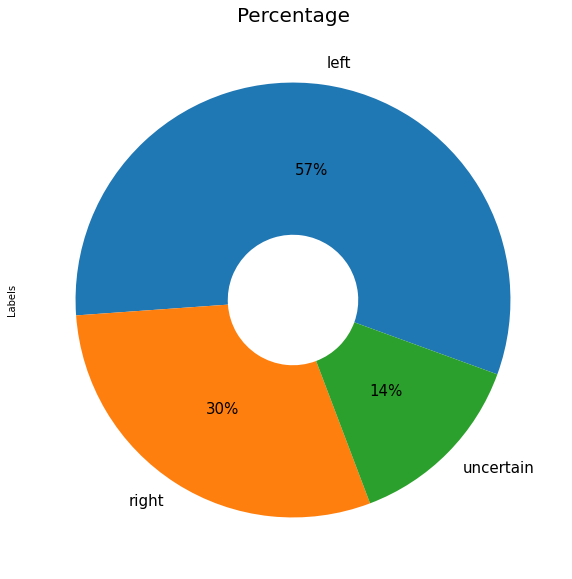

In [ ]:
plt.figure(figsize=(30,10))
plt.title('Percentage', fontsize=20)
df.Labels.value_counts().plot(kind='pie', labels=['left','right','uncertain'],
                              wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20, 
                              textprops={'fontsize': 15})

In [ ]:
df

,Political,Labels,lemmatized,tweet_str,card2vec
2,1.0,0,"[b'leader, raid, snoop, conversation, slap, sedition, critic, petty, insecure, vindictive, man, ...",b'leader raid snoop conversation slap sedition critic petty insecure vindictive man sir,"[-0.23356124758720398, -0.03547735512256622, -0.09566096216440201, 0.11870063096284866, 0.060603..."
3,1.0,2,"[b'telegraph, hit, nail, head]",b'telegraph hit nail head,"[0.020993907004594803, -0.03149423748254776, -0.08763667196035385, 0.07267534732818604, -0.00027..."
4,1.0,2,"[b'rt, rsf_inter, thread, blatant, case, medium, intimidation, india, rsf_inter, condemns, stron...",b'rt rsf_inter thread blatant case medium intimidation india rsf_inter condemns strong term mult...,"[0.04786405712366104, -0.10101903229951859, -0.2047395408153534, 0.11841928213834763, -0.1008817..."
8,1.0,0,"[b'rt, ranaayyub, announcement, crucial, juncture, press, freedom, india, joining, substackinc, ...",b'rt ranaayyub announcement crucial juncture press freedom india joining substackinc platform li...,"[-0.03565210849046707, -0.09509562700986862, -0.19385123252868652, 0.17842483520507812, -0.00462..."
9,1.0,0,"[b'arre, madam, exist, prove, citizenship, forever, indebted]",b'arre madam exist prove citizenship forever indebted,"[-0.03917243331670761, -0.041972436010837555, -0.189788818359375, 0.19913773238658905, -0.009300..."
...,...,...,...,...,...
4799,1.0,1,"[b'it, incredible, thing, rarely, talk, about.\n\ntoday, learn, jamia, milium, delhi, reserve, 5...",b'it incredible thing rarely talk about.\n\ntoday learn jamia milium delhi reserve 50 seat ...,"[0.10251200944185257, -0.035038355737924576, -0.28471192717552185, 0.13700109720230103, -0.04618..."
4800,1.0,2,"[b'rt, rohitjo14921532, zulu, deal, curry, relative, learn, speak, racist, attack, indians, sou,...",b'rt rohitjo14921532 zulu deal curry relative learn speak racist attack indians sou ...,"[0.0035261015873402357, -0.21235109865665436, -0.1514991670846939, 0.15571923553943634, 0.027359..."
4801,1.0,1,"[b'rt, opindia_com, send, message, communist, kerala, relaxed, covid, norm, eid, pakistan, abhis...",b'rt opindia_com send message communist kerala relaxed covid norm eid pakistan abhishbanerj writ...,"[-0.022915158420801163, 0.12234174460172653, -0.24888746440410614, 0.26728126406669617, -0.12176..."
4803,1.0,1,"[b'rt, jkd18, really, shake, ..., perceptive, abhishbanerj, see, certainly, brave, share, u, kno...",b'rt jkd18 really shake ... perceptive abhishbanerj see certainly brave share u know ...,"[0.1184026226401329, -0.10239211469888687, -0.1822483390569687, 0.08803988993167877, -0.01329048..."


In [ ]:
df['new_str'] = df['tweet_str']
df.head(2)

,Political,Labels,lemmatized,tweet_str,card2vec,new_str
2,1.0,0,"[b'leader, raid, snoop, conversation, slap, sedition, critic, petty, insecure, vindictive, man, ...",b'leader raid snoop conversation slap sedition critic petty insecure vindictive man sir,"[-0.23356124758720398, -0.03547735512256622, -0.09566096216440201, 0.11870063096284866, 0.060603...",b'leader raid snoop conversation slap sedition critic petty insecure vindictive man sir
3,1.0,2,"[b'telegraph, hit, nail, head]",b'telegraph hit nail head,"[0.020993907004594803, -0.03149423748254776, -0.08763667196035385, 0.07267534732818604, -0.00027...",b'telegraph hit nail head


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer("english")
message_mat = vectorizer.fit_transform(df['new_str'])
print(message_mat)

# Splitting the data into test and train

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(message_mat, df['Labels'], test_size=0.2, random_state=20)   

  (0, 6269)	0.2883971636624923
  (0, 3894)	0.24158382403129072
  (0, 7204)	0.35476793093342646
  (0, 3230)	0.3368758793778282
  (0, 5079)	0.3368758793778282
  (0, 1604)	0.32418126677368886
  (0, 6060)	0.26033274190243305
  (0, 6288)	0.29948697291500176
  (0, 1497)	0.2935946026139512
  (0, 6322)	0.22722383534301707
  (0, 5496)	0.2399184479471564
  (0, 3719)	0.21836879367085232
  (1, 2907)	0.4318429488707842
  (1, 4289)	0.5531295899621134
  (1, 2977)	0.4735305038089643
  (1, 6718)	0.5322858124930234
  (2, 6699)	0.2296010884469397
  (2, 4227)	0.2589364665762003
  (2, 6730)	0.24315652863334355
  (2, 6517)	0.24315652863334355
  (2, 1426)	0.27722812214434506
  (2, 3174)	0.13139616907030258
  (2, 3283)	0.2971084928136211
  (2, 4003)	0.1756491242666621
  (2, 1133)	0.18052023793107203
  :	:
  (2278, 4040)	0.3114796151679542
  (2278, 2130)	0.2574513211037265
  (2278, 7400)	0.25117950225989444
  (2278, 1562)	0.2081510814459326
  (2278, 5860)	0.08176481821651861
  (2279, 1188)	0.373207780631869
  

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Spam_model = LogisticRegression(solver='liblinear', penalty='l1')
Spam_model.fit(X_train, y_train)

# accuracy_score(spam_nospam_test,pred)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred = Spam_model.predict(X_test)
pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0,

In [ ]:
accuracy_score(y_test,pred)

0.6783369803063457

[Text(0, 0.5, 'True'), Text(0.5, 0, 'Predicted')]

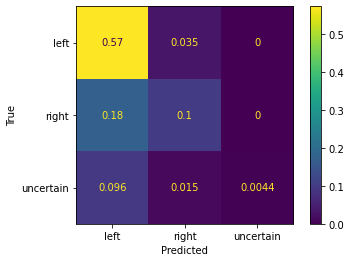

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, pred, normalize='all')
labels = ['left','right','uncertain']
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
ps = precision_score(y_test, pred,average='macro')
rs = recall_score(y_test, pred,average='macro')
fs = f1_score(y_test,pred,average='macro')
ps

0.7818077144502015

In [ ]:
rs

0.4484204191004788

In [ ]:
fs

0.44455959034272285

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
ps = precision_score(y_test, pred,average='micro')
rs = recall_score(y_test, pred,average='micro')
fs = f1_score(y_test,pred,average='micro')
ps

0.6783369803063457

In [ ]:
rs

0.6783369803063457

In [ ]:
fs

0.6783369803063457

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
ps = precision_score(y_test, pred,average='weighted')
rs = recall_score(y_test, pred,average='weighted')
fs = f1_score(y_test,pred,average='weighted')
ps

0.7126789945692226

In [ ]:
rs

0.6783369803063457

In [ ]:
fs

0.6185694561693086

In [ ]:

import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import metrics
 
import plotly.graph_objs as go


In [ ]:
#multinomial LR
def main():
    # Train multi-class logistic regression model
    lr = linear_model.LogisticRegression()
    lr.fit(X_train, y_train)
    mul_lr = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg').fit(X_train, y_train)
    
    print("Logistic regression Train Accuracy :: ", metrics.accuracy_score(y_train, lr.predict(X_train)))
    print("Logistic regression Test Accuracy :: ", metrics.accuracy_score(y_test, lr.predict(X_test)))
    
    print("Multinomial Logistic regression Train Accuracy :: ", metrics.accuracy_score(y_train, mul_lr.predict(X_train)))
    print("Multinomial Logistic regression Test Accuracy :: ", metrics.accuracy_score(y_test, mul_lr.predict(X_test)))
 
if __name__ == "__main__":
    main()


Logistic regression Train Accuracy ::  0.850328947368421
Logistic regression Test Accuracy ::  0.7264770240700219
Multinomial Logistic regression Train Accuracy ::  0.850328947368421
Multinomial Logistic regression Test Accuracy ::  0.7264770240700219


In [ ]:
# Decision Tree
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

y_pred
accuracy_score(y_test,y_pred)


0.5929978118161926

[Text(0, 0.5, 'True'), Text(0.5, 0, 'Predicted')]

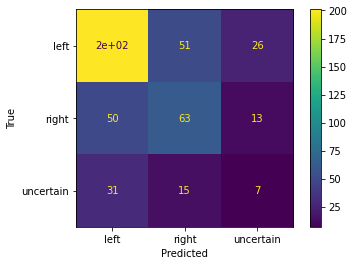

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
labels = ['left','right','uncertain']
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
ps = precision_score(y_test, y_pred,average='micro')
rs = recall_score(y_test, y_pred,average='micro')
fs = f1_score(y_test,y_pred,average='micro')
ps

0.5929978118161926

In [ ]:
rs

0.5929978118161926

In [ ]:
ps

0.5929978118161926

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
ps = precision_score(y_test, y_pred,average='macro')
rs = recall_score(y_test, y_pred,average='macro')
fs = f1_score(y_test,y_pred,average='macro')
ps

0.45110398783784755

In [ ]:
rs

0.45169901814397534

In [ ]:
fs

0.45112964377670256

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
ps = precision_score(y_test, y_pred,average='weighted')
rs = recall_score(y_test, y_pred,average='weighted')
fs = f1_score(y_test,y_pred,average='weighted')
ps

0.5858841078390533

In [ ]:
rs

0.5929978118161926

In [ ]:
fs

0.5893174151830349

In [ ]:
# SVM
#Model is missing 
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred

accuracy_score(y_test,y_pred)

0.6958424507658644

In [ ]:
# Multinomial SVM - LinearSVC (one vs rest classifier)
from sklearn.svm import LinearSVC 
from sklearn.multiclass import OneVsRestClassifier 
from sklearn.metrics import plot_confusion_matrix 
svm = LinearSVC(random_state = 42) # create SVM 
ovr_classifier = OneVsRestClassifier(svm) 
ovr_classifier = ovr_classifier.fit(X_train,y_train)
y_pred = ovr_classifier.predict(X_test)
y_pred

accuracy_score(y_test,y_pred)

0.7199124726477024

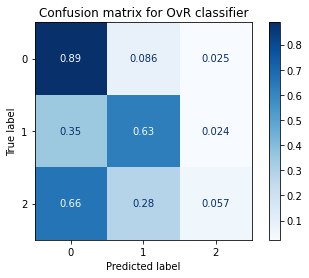

In [ ]:
from sklearn.metrics import plot_confusion_matrix
matrix = plot_confusion_matrix(ovr_classifier, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for OvR classifier')
plt.show(matrix)
plt.show()

[Text(0, 0.5, 'True'), Text(0.5, 0, 'Predicted')]

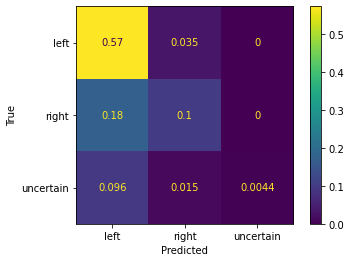

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, pred, normalize='all')
labels = ['left','right','uncertain']
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
ps = precision_score(y_test, pred,average='micro')
rs = recall_score(y_test, pred,average='micro')
fs = f1_score(y_test,pred,average='micro')
ps

0.6783369803063457

In [ ]:
rs

0.6783369803063457

In [ ]:
fs

0.6783369803063457

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
ps = precision_score(y_test, y_pred,average='macro')
rs = recall_score(y_test, y_pred,average='macro')
fs = f1_score(y_test,y_pred,average='macro')
ps

0.5526431559498004

In [ ]:
rs

0.5240257030673754

In [ ]:
fs

0.5187769564058783

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
ps = precision_score(y_test, y_pred,average='weighted')
rs = recall_score(y_test, y_pred,average='weighted')
fs = f1_score(y_test,y_pred,average='weighted')
ps

0.6722507730298685

In [ ]:
rs

0.7199124726477024

In [ ]:
fs

0.6866065791679656

In [ ]:
#multinomial naive bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

Spam_model = MultinomialNB()
Spam_model.fit(X_test, y_test)
MultinomialNB()
print(Spam_model.predict(X_train[2:3]))
# accuracy_score(spam_nospam_test,pred)

[0]


In [ ]:
pred = Spam_model.predict(X_test)
pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [ ]:
accuracy_score(y_test,pred)

0.7439824945295405

[Text(0, 0.5, 'True'), Text(0.5, 0, 'Predicted')]

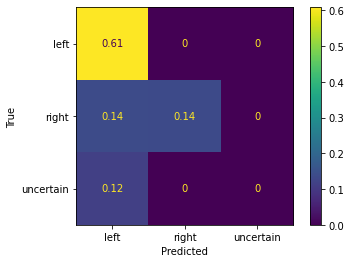

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, pred, normalize='all')
labels = ['left','right','uncertain']
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')


In [ ]:
Spam_model.fit(X_test, y_test, sample_weight=None)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
Spam_model.get_params(deep=True)

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

In [ ]:
Spam_model.partial_fit(X_test, y_test, classes=None, sample_weight=None)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
Spam_model.predict(X_test)

array([0, 1, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 2, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 2, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,

In [ ]:
Spam_model.predict_log_proba(X_test)

array([[-0.07270304, -3.25935505, -3.45112602],
       [-1.15034016, -0.50301966, -2.54123563],
       [-1.43492522, -2.14672471, -0.43850415],
       ...,
       [-0.12521276, -2.68684381, -3.00385899],
       [-0.11476009, -2.53667927, -3.53046623],
       [-0.43041314, -1.20750461, -2.97951896]])

In [ ]:
Spam_model.predict_proba(X_test)

array([[0.92987693, 0.03841316, 0.03170991],
       [0.31652908, 0.60470191, 0.07876901],
       [0.23813317, 0.1168663 , 0.64500053],
       ...,
       [0.88230917, 0.06809552, 0.04959531],
       [0.89158001, 0.07912873, 0.02929126],
       [0.6502404 , 0.29894233, 0.05081727]])

In [ ]:
Spam_model.score(X_test, y_test, sample_weight=None)

0.8818380743982495

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
ps = precision_score(y_test, pred,average='macro')
rs = recall_score(y_test, pred,average='macro')
fs = f1_score(y_test,pred,average='macro')
ps

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



0.5679324894514768

In [ ]:
rs

0.4973544973544974

In [ ]:
fs

0.49524200942113744

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
ps = precision_score(y_test, pred,average='micro')
rs = recall_score(y_test, pred,average='micro')
fs = f1_score(y_test,pred,average='micro')
ps

0.7439824945295405

In [ ]:
rs

0.7439824945295405

In [ ]:
fs

0.7439824945295406

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
ps = precision_score(y_test, pred,average='weighted')
rs = recall_score(y_test, pred,average='weighted')
fs = f1_score(y_test,pred,average='weighted')
ps

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



0.7038417860011633

In [ ]:
rs

0.7439824945295405

In [ ]:
fs

0.6844125092085175

**Hyperparameter tuning to find the best model**

In [ ]:

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier



model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            
        }   
    },
    'naive_bayes': {
        'model': MultinomialNB(),
        'params': {
            'alpha': [1,100,1000],
        }
        }     
}



In [ ]:
from sklearn import datasets
digits = datasets.load_digits()

from sklearn.model_selection import GridSearchCV
import pandas as pd
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(digits.data, digits.target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
data = pd.DataFrame(scores,columns=['model','best_score','best_params'])
data




,model,best_score,best_params
0,svm,0.947697,"{'C': 1, 'kernel': 'linear'}"
1,logistic_regression,0.922114,{'C': 1}
2,decision_tree,0.809155,{'criterion': 'entropy'}
3,naive_bayes,0.876476,{'alpha': 1000}


**Hence, according to the above table , SVM is the best model according to the hyperparameters.**

In [ ]:
df

,Political,Labels,lemmatized,tweet_str,card2vec,new_str
2,1.0,0,"[b'leader, raid, snoop, conversation, slap, sedition, critic, petty, insecure, vindictive, man, ...",b'leader raid snoop conversation slap sedition critic petty insecure vindictive man sir,"[-0.23356124758720398, -0.03547735512256622, -0.09566096216440201, 0.11870063096284866, 0.060603...",b'leader raid snoop conversation slap sedition critic petty insecure vindictive man sir
3,1.0,2,"[b'telegraph, hit, nail, head]",b'telegraph hit nail head,"[0.020993907004594803, -0.03149423748254776, -0.08763667196035385, 0.07267534732818604, -0.00027...",b'telegraph hit nail head
4,1.0,2,"[b'rt, rsf_inter, thread, blatant, case, medium, intimidation, india, rsf_inter, condemns, stron...",b'rt rsf_inter thread blatant case medium intimidation india rsf_inter condemns strong term mult...,"[0.04786405712366104, -0.10101903229951859, -0.2047395408153534, 0.11841928213834763, -0.1008817...",b'rt rsf_inter thread blatant case medium intimidation india rsf_inter condemns strong term mult...
8,1.0,0,"[b'rt, ranaayyub, announcement, crucial, juncture, press, freedom, india, joining, substackinc, ...",b'rt ranaayyub announcement crucial juncture press freedom india joining substackinc platform li...,"[-0.03565210849046707, -0.09509562700986862, -0.19385123252868652, 0.17842483520507812, -0.00462...",b'rt ranaayyub announcement crucial juncture press freedom india joining substackinc platform li...
9,1.0,0,"[b'arre, madam, exist, prove, citizenship, forever, indebted]",b'arre madam exist prove citizenship forever indebted,"[-0.03917243331670761, -0.041972436010837555, -0.189788818359375, 0.19913773238658905, -0.009300...",b'arre madam exist prove citizenship forever indebted
...,...,...,...,...,...,...
4799,1.0,1,"[b'it, incredible, thing, rarely, talk, about.\n\ntoday, learn, jamia, milium, delhi, reserve, 5...",b'it incredible thing rarely talk about.\n\ntoday learn jamia milium delhi reserve 50 seat ...,"[0.10251200944185257, -0.035038355737924576, -0.28471192717552185, 0.13700109720230103, -0.04618...",b'it incredible thing rarely talk about.\n\ntoday learn jamia milium delhi reserve 50 seat ...
4800,1.0,2,"[b'rt, rohitjo14921532, zulu, deal, curry, relative, learn, speak, racist, attack, indians, sou,...",b'rt rohitjo14921532 zulu deal curry relative learn speak racist attack indians sou ...,"[0.0035261015873402357, -0.21235109865665436, -0.1514991670846939, 0.15571923553943634, 0.027359...",b'rt rohitjo14921532 zulu deal curry relative learn speak racist attack indians sou ...
4801,1.0,1,"[b'rt, opindia_com, send, message, communist, kerala, relaxed, covid, norm, eid, pakistan, abhis...",b'rt opindia_com send message communist kerala relaxed covid norm eid pakistan abhishbanerj writ...,"[-0.022915158420801163, 0.12234174460172653, -0.24888746440410614, 0.26728126406669617, -0.12176...",b'rt opindia_com send message communist kerala relaxed covid norm eid pakistan abhishbanerj writ...
4803,1.0,1,"[b'rt, jkd18, really, shake, ..., perceptive, abhishbanerj, see, certainly, brave, share, u, kno...",b'rt jkd18 really shake ... perceptive abhishbanerj see certainly brave share u know ...,"[0.1184026226401329, -0.10239211469888687, -0.1822483390569687, 0.08803988993167877, -0.01329048...",b'rt jkd18 really shake ... perceptive abhishbanerj see certainly brave share u know ...


In [ ]:
left = df['Labels'].value_counts()[0]
left

1293

In [ ]:
right = df['Labels'].value_counts()[1]
right

676

In [ ]:
uncertain = df['Labels'].value_counts()[2]
uncertain

312